<a href="https://colab.research.google.com/github/DiegoMejiaLLeras/Diplomado_Inteligencia_Artificial/blob/main/TallerPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

In [49]:
data=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')

In [50]:
data.head(2)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0


# 1. Diga qué índices serían pertinentes tener y póngalos.

Suponiendo que la variable No es el identificador de registro:

In [109]:
data=data.set_index(['No'])
data.head(5)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# 2. Elimine registros que tengan NA en la columna "pm2.5"

In [110]:
data = data[data['pm2.5'].notna()]
data.head(2)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0


# 3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

In [111]:
descripcion=data[['year','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].groupby('year').describe()
descripcion


pm2.5                                    ...   Ir                     
       count        mean        std  min   25%  ...  min  25%  50%  75%   max
year                                            ...                          
2010  8091.0  104.045730  92.281185  1.0  35.0  ...  0.0  0.0  0.0  0.0  36.0
2011  8032.0   99.071340  92.967298  2.0  27.0  ...  0.0  0.0  0.0  0.0  23.0
2012  8295.0   90.545871  81.745087  0.0  25.0  ...  0.0  0.0  0.0  0.0  32.0
2013  8678.0  101.712376  98.070477  2.0  32.0  ...  0.0  0.0  0.0  0.0  25.0
2014  8661.0   97.734557  93.531528  2.0  28.0  ...  0.0  0.0  0.0  0.0  23.0

[5 rows x 56 columns]

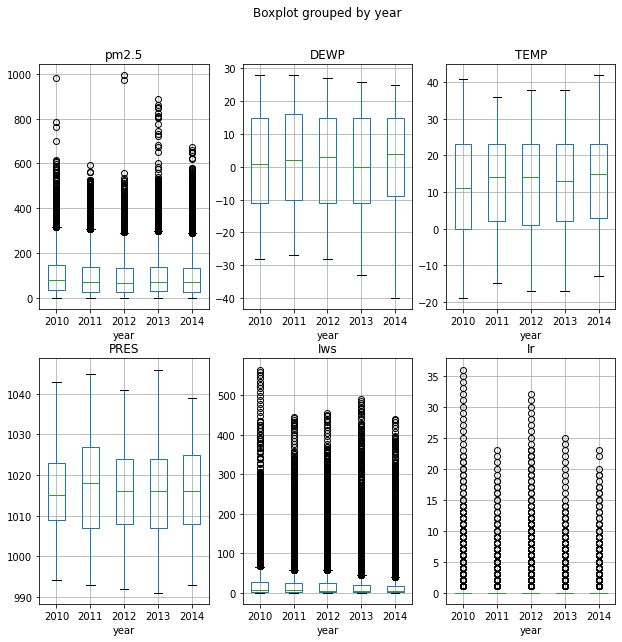

In [127]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(10, 10))

data.boxplot(column='pm2.5', by='year', ax=axes[0,0]) 
data.boxplot(column='DEWP', by='year', ax=axes[0,1]) 
data.boxplot(column='TEMP', by='year', ax=axes[0,2]) 
data.boxplot(column='PRES', by='year', ax=axes[1,0]) 
data.boxplot(column='Iws', by='year', ax=axes[1,1])
data.boxplot(column='Ir', by='year', ax=axes[1,2]) 
plt.show()

 # 4. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

In [112]:
data[['pm2.5','year']].groupby('year').mean().sort_values(by=['pm2.5'])

,pm2.5
year,
2012,90.545871
2014,97.734557
2011,99.071340
2013,101.712376
2010,104.045730
